<a href="https://colab.research.google.com/github/roshini-joga/3-Layer-Deep-Neural-Network-for-Non-Linear-Regression/blob/master/NumPy(3_layer).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

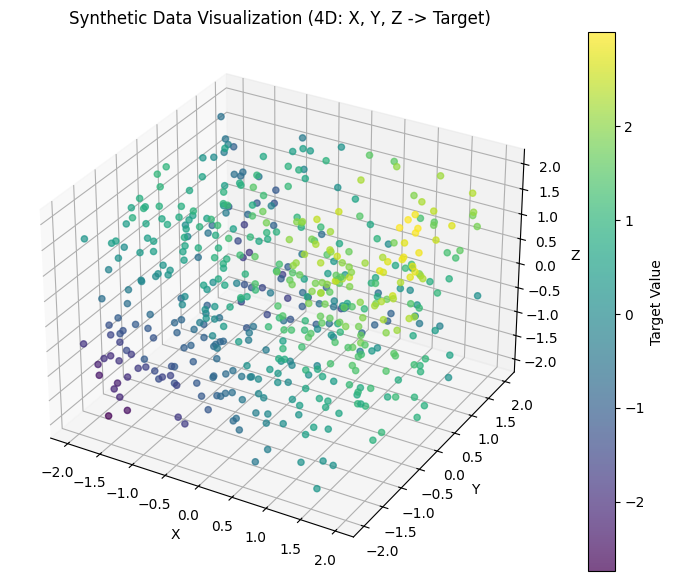

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the 3-variable non-linear equation
def nonlinear_equation(x, y, z):
    return np.sin(x) + np.cos(y) + np.tanh(z) + 0.1 * x * y * z

# Generate synthetic data
np.random.seed(42)
num_samples = 500

x = np.random.uniform(-2, 2, num_samples)
y = np.random.uniform(-2, 2, num_samples)
z = np.random.uniform(-2, 2, num_samples)

# Compute the output based on the equation
target = nonlinear_equation(x, y, z)

# Visualize the data in 4D (3D plot with color indicating the 4th dimension)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color representing the output value
sc = ax.scatter(x, y, z, c=target, cmap='viridis', marker='o', alpha=0.7)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
fig.colorbar(sc, label='Target Value')

plt.title("Synthetic Data Visualization (4D: X, Y, Z -> Target)")
plt.show()


In [2]:
# Define the architecture of the neural network
input_size = 3   # Three input variables (x, y, z)
hidden_size1 = 10  # First hidden layer neurons
hidden_size2 = 8   # Second hidden layer neurons
output_size = 1   # Single output

# Initialize weights and biases
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size1) * 0.1
b1 = np.zeros((1, hidden_size1))

W2 = np.random.randn(hidden_size1, hidden_size2) * 0.1
b2 = np.zeros((1, hidden_size2))

W3 = np.random.randn(hidden_size2, output_size) * 0.1
b3 = np.zeros((1, output_size))

# Define activation functions
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

# Forward propagation function
def forward_propagation(X):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)

    Z2 = np.dot(A1, W2) + b2
    A2 = relu(Z2)

    Z3 = np.dot(A2, W3) + b3  # No activation for output layer

    return Z1, A1, Z2, A2, Z3  # Return all values for backpropagation

# Test forward propagation
X_input = np.column_stack((x, y, z))  # Combine x, y, z as input features
_, _, _, _, predictions = forward_propagation(X_input)

# Display first few predictions
predictions[:5]


array([[ 0.00017972],
       [-0.00588215],
       [-0.001087  ],
       [-0.00044855],
       [-0.00014589]])

In [3]:
# Define the Mean Squared Error (MSE) loss function and its derivative
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mse_loss_derivative(y_true, y_pred):
    return -2 * (y_true - y_pred) / y_true.shape[0]

# Learning rate and epochs
learning_rate = 0.01
epochs = 1000

# Convert target values to column vector
y_true = target.reshape(-1, 1)

# Training loop with backpropagation
loss_history = []

for epoch in range(epochs):
    # Forward propagation
    Z1, A1, Z2, A2, Z3 = forward_propagation(X_input)
    y_pred = Z3  # Output

    # Compute loss
    loss = mse_loss(y_true, y_pred)
    loss_history.append(loss)

    # Backpropagation
    dL_dZ3 = mse_loss_derivative(y_true, y_pred)  # Gradient of loss wrt output
    dL_dW3 = np.dot(A2.T, dL_dZ3)
    dL_db3 = np.sum(dL_dZ3, axis=0, keepdims=True)

    dL_dA2 = np.dot(dL_dZ3, W3.T)
    dL_dZ2 = dL_dA2 * relu_derivative(Z2)
    dL_dW2 = np.dot(A1.T, dL_dZ2)
    dL_db2 = np.sum(dL_dZ2, axis=0, keepdims=True)

    dL_dA1 = np.dot(dL_dZ2, W2.T)
    dL_dZ1 = dL_dA1 * relu_derivative(Z1)
    dL_dW1 = np.dot(X_input.T, dL_dZ1)
    dL_db1 = np.sum(dL_dZ1, axis=0, keepdims=True)

    # Update weights and biases using gradient descent
    W3 -= learning_rate * dL_dW3
    b3 -= learning_rate * dL_db3
    W2 -= learning_rate * dL_dW2
    b2 -= learning_rate * dL_db2
    W1 -= learning_rate * dL_dW1
    b1 -= learning_rate * dL_db1

    # Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.6f}")

# Final loss after training
print(f"Final Loss after {epochs} epochs: {loss_history[-1]:.6f}")


Epoch 0, Loss: 1.695822
Epoch 100, Loss: 1.435537
Epoch 200, Loss: 1.421773
Epoch 300, Loss: 1.388471
Epoch 400, Loss: 1.217918
Epoch 500, Loss: 0.573163
Epoch 600, Loss: 0.338622
Epoch 700, Loss: 0.266807
Epoch 800, Loss: 0.226199
Epoch 900, Loss: 0.194212
Final Loss after 1000 epochs: 0.158981


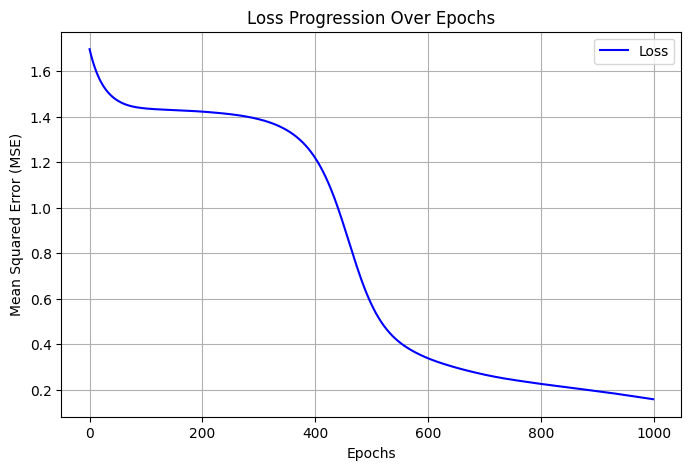

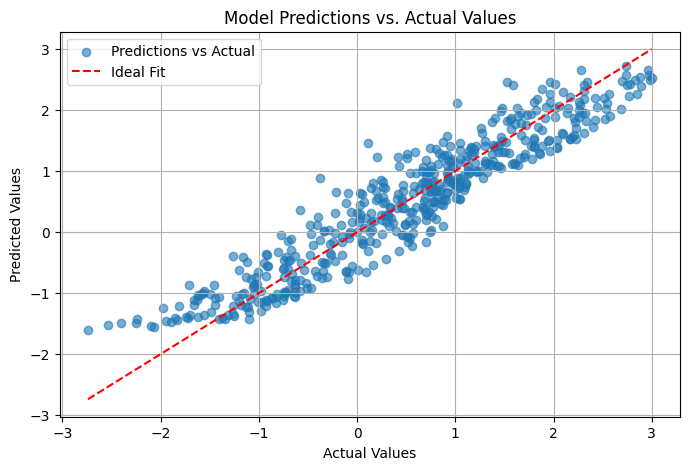

In [4]:
# Plot loss progression
plt.figure(figsize=(8, 5))
plt.plot(loss_history, label="Loss", color="blue")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Loss Progression Over Epochs")
plt.legend()
plt.grid(True)
plt.show()

# Generate final predictions
_, _, _, _, final_predictions = forward_propagation(X_input)

# Scatter plot comparing predictions vs actual values
plt.figure(figsize=(8, 5))
plt.scatter(y_true, final_predictions, alpha=0.6, label="Predictions vs Actual")
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color="red", linestyle="dashed", label="Ideal Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Model Predictions vs. Actual Values")
plt.legend()
plt.grid(True)
plt.show()
